In [4]:
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# age 열의 첫 10개 데이터 출력 (5 행에 NaN 값)
df['age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

<Axes: >

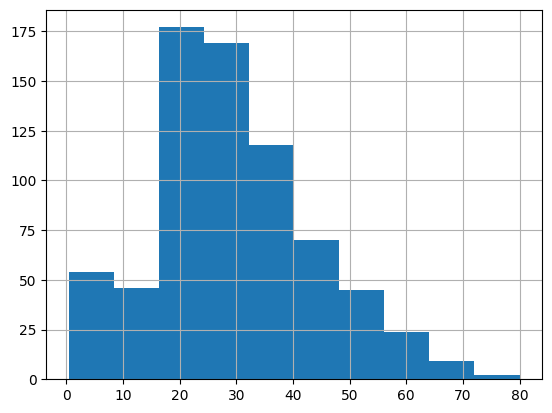

In [5]:
# 나이에 대한 hist를 그려보자
df['age'].hist() # 분포가 좋으면 평균값이 좋음을 뜻함.

In [6]:
# age 열의 NaN값을 다른 나이 데이터의 평균으로 변경하기
mean_age = df['age'].mean(axis=0)   # age 열의 평균 계산 (mean은 NaN 값 제외하고 계산해줌)
df['age'] = df['age'].fillna(mean_age)

# age 열의 첫 10개 데이터 출력 (5 행에 NaN 값이 평균으로 대체)
df['age'].head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64

In [7]:
median_age = df['age'].median(axis=0)   # median() -> age 열의 중위값
df['age'] = df['age'].fillna(median_age)

# age 열의 첫 10개 데이터 출력 (5 행에 NaN 값이 평균으로 대체)
df['age'].head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64

In [8]:
df = sns.load_dataset('titanic')
df[df['age'].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [9]:
# 객실별 성별에 따른 나이 평균값으로 해당 결측치를 대처할꺼임
# df.groupby( ['pclass','sex'] )['age'].mean() #→ ↓
df.groupby( ['pclass','sex'] )['age'].transform('mean')

0      26.507589
1      34.611765
2      21.750000
3      34.611765
4      26.507589
         ...    
886    30.740707
887    34.611765
888    21.750000
889    41.281386
890    26.507589
Name: age, Length: 891, dtype: float64

In [10]:
df['age'] = df.groupby( ['pclass','sex'] )['age'].transform('mean')

{'whiskers': [<matplotlib.lines.Line2D at 0x1eb509fd1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1eb509fd450>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eb509fd090>],
 'medians': [<matplotlib.lines.Line2D at 0x1eb509fd6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eb509fd810>],
 'means': []}

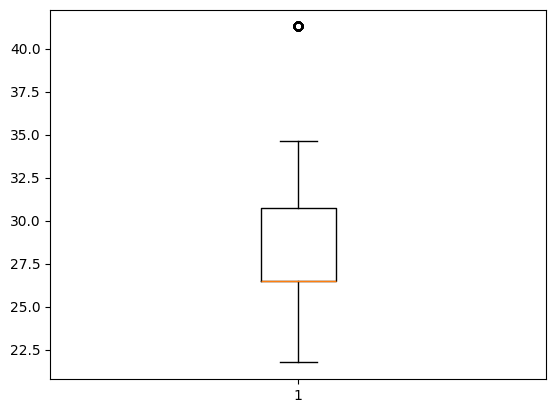

In [13]:
# 평균 vs 중위수 어떤 기준으로 선택하는게 좋은가 (전체 데이터 기준)
# 평균을 사용할때는 이상치의 비중을 알아야함
    # 이상치의 비중이 낮을때
# 중위수
    # 이상치의 비중이 높을때

# 결측치가 50% 이상일때 신뢰도가 낮아짐, 평균과 중위수 필요없음
# 머신러닝이나 딥러닝 기반의 보간을 고려해본다.

import matplotlib.pyplot as plt
plt.boxplot(df['age'])

<Axes: >

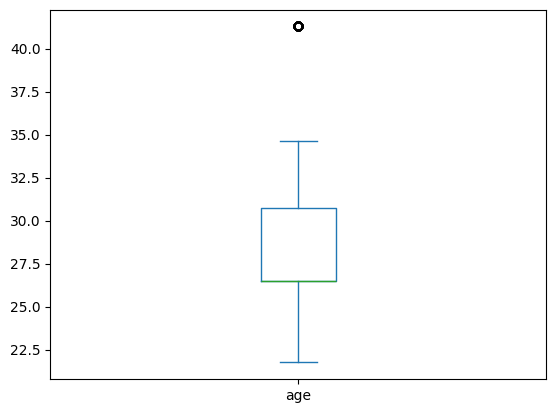

In [ ]:
# 결측치가 없는 상태에서 이상치를 찾는것..
# IQR은 데이터 중간 50% 범위를 의미. 이상치 탐지 기준으로 자주 씀
q1 = df['age'].quantile(0.25) #25%구하는것.
q3 = df['age'].quantile(0.75)
iqr = q3 - q1
lower = q1 - iqr
upper = q3 + iqr
# lower , upper # 확인
# mask = lower < df['age']
outlier_mask = (df['age'] >= lower) | (df['age'] <= upper) #우선순위 괄호.
df[outlier_mask]['age'].plot(kind = 'box')

